### Task 1: Table Booking and Online Delivery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\Dataset .csv")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df[['Has Table booking', 'Has Online delivery', 'Aggregate rating', 'Price range']].head()

,Has Table booking,Has Online delivery,Aggregate rating,Price range
0,Yes,No,4.8,3
1,Yes,No,4.5,3
2,Yes,No,4.4,4
3,No,No,4.9,4
4,Yes,No,4.8,4


In [5]:
table_booking_counts = df['Has Table booking'].value_counts()
table_booking_counts

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [6]:
table_booking_percentage = (table_booking_counts / len(df)) * 100
table_booking_percentage

Has Table booking
No     87.875615
Yes    12.124385
Name: count, dtype: float64

In [7]:
online_delivery_counts = df['Has Online delivery'].value_counts()
online_delivery_counts

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [8]:
online_delivery_percentage = (online_delivery_counts / len(df) * 100)
online_delivery_percentage

Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64

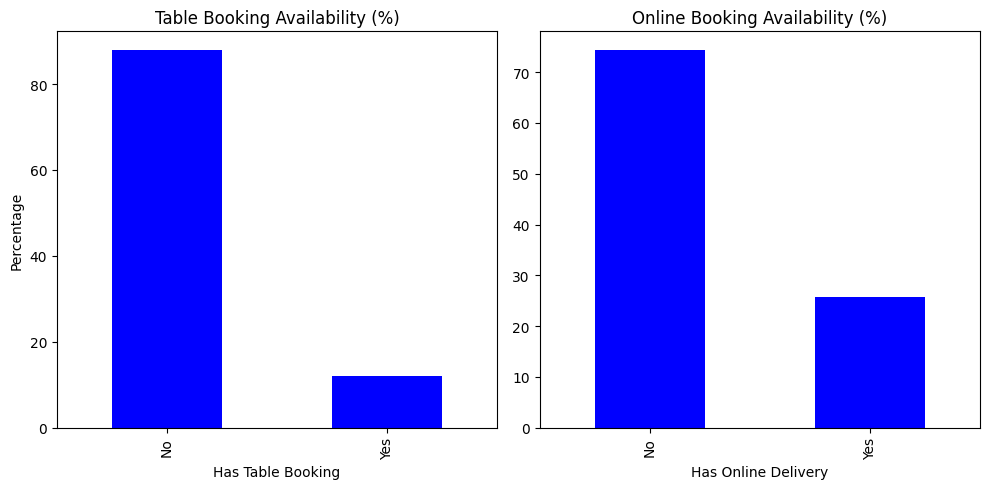

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
table_booking_percentage.plot(kind='bar', color='blue')
plt.title('Table Booking Availability (%)')
plt.xlabel('Has Table Booking')
plt.ylabel('Percentage')

plt.subplot(1,2,2)
online_delivery_percentage.plot(kind='bar', color='blue')
plt.title('Online Booking Availability (%)')
plt.xlabel('Has Online Delivery')

plt.tight_layout()
plt.show()

In [10]:
# Average Rating: Table Booking vs No Table Booking

avg_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
avg_table_booking

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

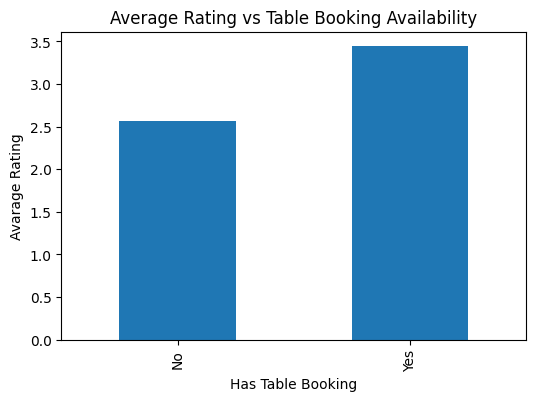

In [11]:
plt.figure(figsize=(6,4))
avg_table_booking.plot(kind='bar')
plt.title("Average Rating vs Table Booking Availability")
plt.xlabel("Has Table Booking")
plt.ylabel("Avarage Rating")
plt.show()

In [12]:
# Online Delivery Availability by Price Range

delivery_price_analysis = pd.crosstab(df['Price range'], df['Has Online delivery'],normalize='index') * 100
delivery_price_analysis

Has Online delivery,No,Yes
Price range,,
1,84.225923,15.774077
2,58.689367,41.310633
3,70.809659,29.190341
4,90.955631,9.044369


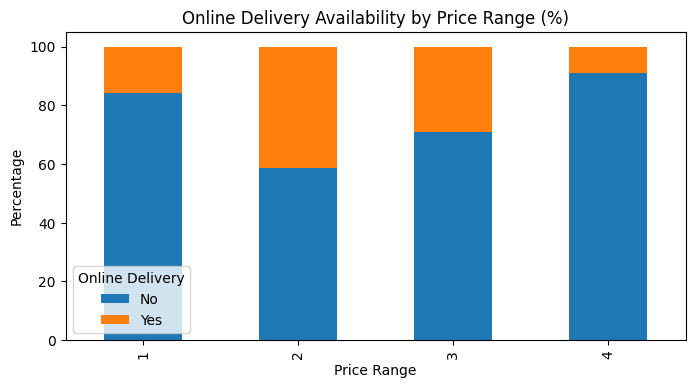

In [13]:
delivery_price_analysis.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title("Online Delivery Availability by Price Range (%)")
plt.xlabel("Price Range")
plt.ylabel("Percentage")
plt.legend(title="Online Delivery")
plt.show()

### Task 2: Price Range Analysis

In [14]:
df[['Price range', 'Aggregate rating', 'Rating color']].head()

,Price range,Aggregate rating,Rating color
0,3,4.8,Dark Green
1,3,4.5,Dark Green
2,4,4.4,Green
3,4,4.9,Dark Green
4,4,4.8,Dark Green


In [15]:
price_range_counts = df['Price range'].value_counts()
price_range_counts

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [16]:
most_common_price_range = price_range_counts.idxmax()
print('most_common_price_range :',most_common_price_range )

most_common_price_range : 1


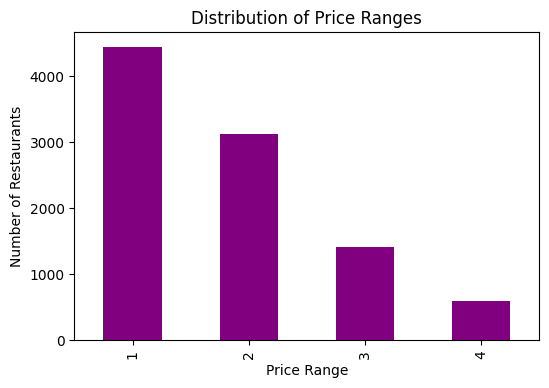

In [17]:
plt.figure(figsize=(6,4))
price_range_counts.plot(kind='bar', color='purple')
plt.title("Distribution of Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

In [18]:
# Average Rating for Each Price Range

avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
avg_rating_by_price

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

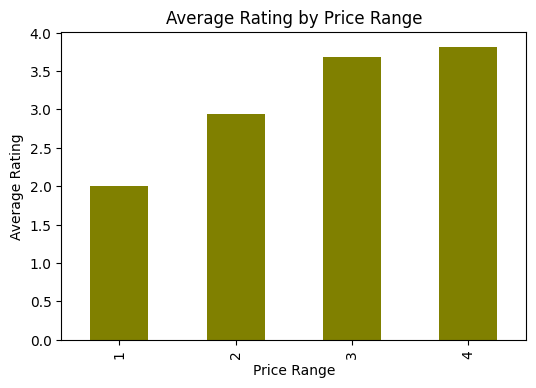

In [19]:
plt.figure(figsize=(6,4))
avg_rating_by_price.plot(kind='bar', color='olive')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()

In [20]:
# Average rating grouped by rating color

avg_rating_by_color = df.groupby('Rating color')['Aggregate rating'].mean().sort_values(ascending=False)
avg_rating_by_color

Rating color
Dark Green    4.659801
Green         4.168119
Yellow        3.683429
Orange        3.051619
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64

In [21]:
highest_rating_color = avg_rating_by_color.idxmax()
print("Rating Color with Highest Average Rating:", highest_rating_color)

Rating Color with Highest Average Rating: Dark Green


In [22]:
# Relationship between Price Range & Rating Color

price_color_analysis = df.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean()
price_color_analysis

Price range  Rating color
1            Dark Green      4.668750
             Green           4.157639
             Orange          3.040464
             Red             2.293548
             White           0.000000
             Yellow          3.661842
2            Dark Green      4.627536
             Green           4.159385
             Orange          3.048491
             Red             2.300000
             White           0.000000
             Yellow          3.671159
3            Dark Green      4.646032
             Green           4.169231
             Orange          3.097764
             Red             2.305000
             White           0.000000
             Yellow          3.716265
4            Dark Green      4.709459
             Green           4.188144
             Orange          3.162376
             Red             2.283333
             White           0.000000
             Yellow          3.716000
Name: Aggregate rating, dtype: float64

### Task 3: Feature Engineering

In [23]:
df['Restaurant_Name_Length']= df['Restaurant Name'].str.len()
df['Address_Length']= df['Address'].str.len()

In [24]:
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df['Cuisine_Count'] = df['Cuisines'].apply(lambda x: len(x.split(',')))

In [25]:
# Encoding Categorical Variables into New Features

df['Has_Table_Booking_Encoded'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has_Online_Delivery_Encoded'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Is_Delivering_Now_Encoded'] = df['Is delivering now'].map({'Yes': 1, 'No': 0})

In [26]:
# Check Newly Created Features

df[['Restaurant Name', 'Restaurant_Name_Length', 'Address_Length', 'Cuisine_Count', 'Has_Table_Booking_Encoded', 
    'Has_Online_Delivery_Encoded','Is_Delivering_Now_Encoded']].head()

,Restaurant Name,Restaurant_Name_Length,Address_Length,Cuisine_Count,Has_Table_Booking_Encoded,Has_Online_Delivery_Encoded,Is_Delivering_Now_Encoded
0,Le Petit Souffle,16,71,3,1,0,0
1,Izakaya Kikufuji,16,67,1,1,0,0
2,Heat - Edsa Shangri-La,22,56,4,1,0,0
3,Ooma,4,70,2,0,0,0
4,Sambo Kojin,11,64,2,1,0,0


In [27]:
# Check Missing Values in New Features

df[['Restaurant Name', 'Restaurant_Name_Length', 'Address_Length', 'Cuisine_Count', 'Has_Table_Booking_Encoded', 
    'Has_Online_Delivery_Encoded','Is_Delivering_Now_Encoded']].isnull().sum()

Restaurant Name                0
Restaurant_Name_Length         0
Address_Length                 0
Cuisine_Count                  0
Has_Table_Booking_Encoded      0
Has_Online_Delivery_Encoded    0
Is_Delivering_Now_Encoded      0
dtype: int64